In [2]:
import sympy as sp
from scipy import *
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np
import pandas as pd
from sympy import Rational as R

# Assignment 1

In [ ]:
# a)
# i. False. A pivot in the last column would result in inconsistency.
# ii. False. A may not be a square matrix. The invertible matrix theorem does not apply here.
# iii. False. det(3A) = 2*3^n, where n is the number of rows/columns in A.
# iv. True. Eigenspaces corresponding to distinct eigenvalues are always disjoint (except at 0).
# v. False. The null space of A, which coincide with the eigenspace corresponding to 0, could have
#    dimension 1 or 2. Thus rank(A) could be 4 or 5.
# vi. True. One can always obtain an orthogonal basis by the Gram-Schmidt process.

In [1]:
# b) We can do row operations: subtract b times r1 from r2 and and b^2 times r1 from r2
# and you will get two rows of zeros. That means free variables which means det A = 0.
# You could also just try to find the determinant using Python.

In [18]:
# c)
# Use the known eigval to solve for b
b = Symbol('b')
b = solve((-1)**2 + b*(-1) + 2)
l1 = -1
b

In [19]:
# l^2 +3l + 2 = -(l+1)(l+2)(l+1)
l1 = -2
l2 = -1
l3 = -1
l1, l2, l3

In [23]:
# d) Trace is sum of eigenvalues.
l2 = Symbol('l2')
l1 = 0
l2 = solve(l1 + l2 + 3*l2 - 16, l2)[0]
l2, 3*l2

# Assignment 2

$$
\begin{aligned}
A^{3}-4 A^{2}+3 A-5 I_{n} &=0 \\
5 I_{n} &=A^{3}-4 A^{2}+3 A \\
5 \cdot I_{n} A^{-1} &=\left(A^{3}-4 A^{2}-3 A\right) A^{-1} \\
A^{-1} &=\frac{1}{5}\left(A^{2}-4 A+3 \cdot I_{n}\right)
\end{aligned}
$$

# Assignment 3

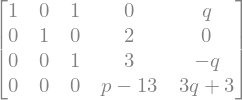

In [6]:
# a)
p, q = symbols('p q')
Matrix([[1,0,1,0, q],[0,1,0,2, 0],[1,0,2,3, 0],[0,2,3,p, 3]]).echelon_form()

In [ ]:
# unique: p != 13, q whatever
# no solution: p = 13, q != -1
# inf. solutions: p = 13, q = -1

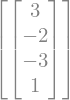

In [15]:
# b)
# Just insert p = 13 in the coefficient matrix and find nullspace
A = Matrix([[1,0,1,0],[0,1,0,2],[1,0,2,3],[0,2,3,13]])
A.nullspace()

# Assignment 4

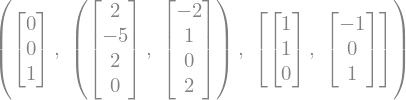

In [20]:
# a)
W1 = Matrix([[1,1,0], [2,1,0]]).T
W2 = Matrix([[1,2,4,0], [2,2,3,1]]).T
W3 = Matrix([1, -1, 1])

# We use "the trick" where just find the nullspace of the transpose since this will be
# the orthogonal complement.
W1C = W1.T.nullspace()[0]
W2C = W2.T.nullspace()
W3C = W3.T.nullspace()
W1C, (2*W2C[0], 2*W2C[1]), W3C

In [27]:
def pivots(M, n):
    p = len(M.rref()[1])
    return p == n

In [40]:
# b)

# We must check 3 things (technically 2):
    # 1) Make sure that the number entries (i.e. number of rows) match the dimension of the space we are interested in
    # 2) Make sure that we have as many pivots as the dimension from (1)
    # 3) Make sure we have no more columns than pivots, since then it would not be a basis
    
V1 = Matrix.hstack(W1, W1C)
V2 = Matrix.hstack(W2, W2C[0], W2C[1])
V3 = Matrix.hstack(W2, W2C[0], W2C[1])
V4 = Matrix.hstack(W1, W3C[0], W3C[1])
V5 = Matrix.hstack(W3, W3C[0], W3C[1])

display(
    V1.shape[0] == 3 and pivots(V1, 3) and V1.shape[1] == 3,
    V2.shape[0] == 2 and pivots(V2, 2) and V2.shape[1] == 2,
    V3.shape[0] == 4 and pivots(V3, 4) and V3.shape[1] == 4,
    V4.shape[0] == 3 and pivots(V4, 3) and V4.shape[1] == 3,
    V5.shape[0] == 3 and pivots(V5, 3) and V5.shape[1] == 3
)

True

False

True

False

True

In [ ]:
# Many thought V4 was a basis since it spans all of R^3, but it consists of 4 vectors,
# so it fails the definition of a basis which is the MINIMUM number of vectors in order to span a vector space.
# The MIN here would be 3 vectors.

# Assignment 5

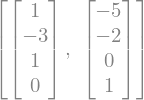

In [24]:
# a)
Z = Matrix([[1,0,-1,5],[0,1,3,2],[0,0,0,0]])
a1 = Matrix([1,2,3])
a2 = Matrix([4, -1, 2])

# The rowspace is just the two pivot rows in R
# The colspace is just the two pivot columns in A
# The nullspace:
Z.nullspace()

In [25]:
# b)
# If it is to be consistent, then [9, 0, a] must be a linear combination of a1 and a2
# That means we put all there in a matrix and reduce to echelon form.
# We now define a such that we get a row of zeros
a = symbols('a')
solve(Matrix.hstack(a1, a2, Matrix([9, 0, a])).echelon_form()[-1,-1])

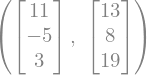

In [26]:
# c)
# Since a only has two pivot columns (a1 and a2), which we know from looking at Z,
# a3 and a4 can be derived from the scales stated in Z (the reduced echelon form)
# To get a3, I need -1 of a1 and 3 of a3
# To get a4, I need 5 of a1 and 2 of a4
a3 = Z[0,2]*a1 + Z[1,2]*a2
a4 = Z[0,3]*a1 + Z[1,3]*a2
a3, a4

In [31]:
# We can check our result by rref'ing our new A and comparing it to Z
A = Matrix.hstack(a1, a2, a3, a4)
A.rref()[0]==Z

True

# Assignment 6

In [32]:
# a)

x = pd.DataFrame([
    math.sin(-math.pi / 2),
    math.sin(0),
    math.sin(math.pi / 2)
])
y = pd.DataFrame([
    1,
    1,
    -1,
])

X = x.astype(int)
X1 = Matrix([ones(len(x), 1)]).row_join(Matrix((X)))

display(Math(latex(X1) + r'\left[\begin{array}{l}\alpha \\ \beta \end{array}\right] = ' + latex(Matrix(y))))

<IPython.core.display.Math object>

In [55]:
# b)
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y = {}{}sin x$$".format(latex(B1[0]), B1[1])))

<IPython.core.display.Latex object>

In [60]:
# c)
Y = Matrix(y)
display(Latex("$$\epsilon = {}$$".format(latex(Y-X1*B1))))
display(Latex("$$e = {}$$".format(latex((Y-X1*B1).norm()))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Assignment 7

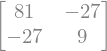

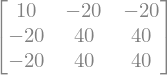

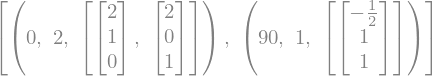

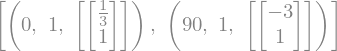

In [101]:
# a)
AtA = Matrix([[81,-27],[-27,9]])
AAt = Matrix([[10,-20,-20],[-20,40,40],[-20,40,40]])
vecs = AAt.eigenvects()
display(AtA)
display(AAt)
display(vecs)
display(AtA.eigenvects())

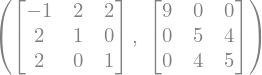

In [107]:
# b)
# The Gram matrix, as mentioned, is AtA. Some thought it had something to do with Gram Schmidt
# The Gram Matrix is the matrix you set up to test whether a set of vectors are orthogonal
# In class we did U.T * U:
x1 = 2*vecs[1][2][0]
x2 = vecs[0][2][0]
x3 = vecs[0][2][1]
X = Matrix.hstack(x1, x2, x3) 
X, (X.T * X)

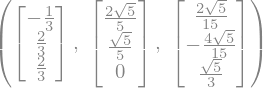

In [108]:
# c)
# From above we see that the vectors are not orthogonal, more specifically
# x2 and x3 are not ortogonal to each other
# We use Gram Schmidt to fix this
u1 = vecs[1][2][0].normalized()
u2 = GramSchmidt([x2, x3], True)[0]
u3 = GramSchmidt([x2, x3], True)[1]
U = Matrix.hstack(u1, u2, u3) 
u1, u2, u3

In [110]:
# d)
# Since AAt is 3 x 3 and AtA is 2 x 2, A must be 3 x 2
# Since only 1 non-zero singular value, rank = 1
# m (number of columns) = dim nul A + dim col A (Rank) so dim nul A = 1
# dim Row is the same as Rank, so 1
# dim Nul A.T is 2 since it is n - rank = 2

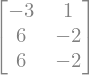

In [6]:
# In case you don't believe me, here is A:
A = Matrix([[-3,1],[6,-2],[6,-2]])
A

# Assignment 8

In total, 5 + 3 litres enter A, which means 8 must leave A from pipe c. If 8 enters B, 8 must leave, 3 from b and 5 from d. We get:

In [2]:
# We translate the problem to a matrix problem

A = Matrix([[-R(8,200), R(3,100)],[R(8,200), -R(8,100)]])
display(Math(r'A = ' + latex(A)))

<IPython.core.display.Math object>

In [3]:
# We find the eigenvalues and the corresponding eigenspaces.
l = symbols('l')
l1, l2 = solve(det(A-l*eye(np.shape(A)[0])))
display(Math(r'\lambda_0 =' +latex(l1) + r'\approx' + latex(round(l1, 2))))
display(Math(r'\lambda_1 =' +latex(l2) + r'\approx' + latex(round(l2, 2))))

v1 = (A-l1*eye(np.shape(A)[0])).nullspace()[0]
v2 = (A-l2*eye(np.shape(A)[0])).nullspace()[0]
display(Math(r'v_0 = '+ latex(v1) + r'=' + latex(v1.evalf(4))))
display(Math(r'v_1 = '+ latex(v2) + r'=' + latex(v2.evalf(4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

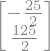

In [4]:
y0 = Matrix([100, 50])

# To solve the system we form the following augmented matrix and solve. The c's will be in the last column:
C = v1.row_join(v2).row_join(y0).rref()[0][:, -1]
C

In [5]:
# a) Wasn't able to use solve, so I just made a for loop to check
for t in range (0,100):
    y1 = float(C[0]*v1[0]*math.e**(l1*t) + C[1]*v2[0]*math.e**(l2*t))
    if y1 <= 50:
        print(t)
        print(y1)
        break
    

32
49.688428528900594


In [8]:
# b)
# Many took my code from the "Do this first" exercise. The problem is that you should
# NEVER use code that you do not know what does! In my code the limit was set to 0,
# but in this problem the limit is inf
# Learning outcome: Do not copy code that you don't understand yourself
# (I did give you 1 point out of 2.5, though :-))
t = symbols('t')
y1 = C[0]*v1[0]*math.e**(l1*t) + C[1]*v2[0]*math.e**(l2*t)
y2 = C[0]*v1[1]*math.e**(l1*t) + C[1]*v2[1]*math.e**(l2*t)
z=limit(y1/y2,t,inf)
z